In [ ]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [ ]:
using DataFrames
using StatsPlots

In [ ]:
using Revise
using Newtrinos
using Newtrinos.osc

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x3d64bdd18f3d6ba6, 0xf37c789df651cdcb, 0x0a71d257bcb26c98, 0xf19c41c97f18667d, 0xb8153d7b477466d4, 0xf643b306b5994db7, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [ ]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
  [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [ ]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}(ThreeFlavour(:NO), SI(), Basic(), Newtrinos.osc.All())

In [ ]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}(ThreeFlavour(:NO), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003)), Newtrinos.osc.var"#matrices#41"(), Newtrinos.osc.var"#osc_prob#38"{Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}}(OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}(ThreeFlavour(:NO), SI(), Basic(), Newtrinos.osc.All())), Core.Box(Newtrinos.osc.v

In [ ]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec = Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [ ]:
experiments = (
 deepcore = Newtrinos.deepcore.configure(physics)
);

[ Info: Loading deepcore data


In [ ]:
p = Newtrinos.get_params(experiments)

(atm_flux_delta_spectral_index = 0.0, atm_flux_nuenumu_sigma = 0.0, atm_flux_nunubar_sigma = 0.0, atm_flux_uphorizonzal_sigma = 0.0, deepcore_atm_muon_scale = 1.0, deepcore_ice_absorption = 1.0, deepcore_ice_scattering = 1.0, deepcore_lifetime = 2.5, deepcore_opt_eff_headon = 0.0, deepcore_opt_eff_lateral = 0.0, deepcore_opt_eff_overall = 1.0, nc_norm = 1.0, nutau_cc_norm = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

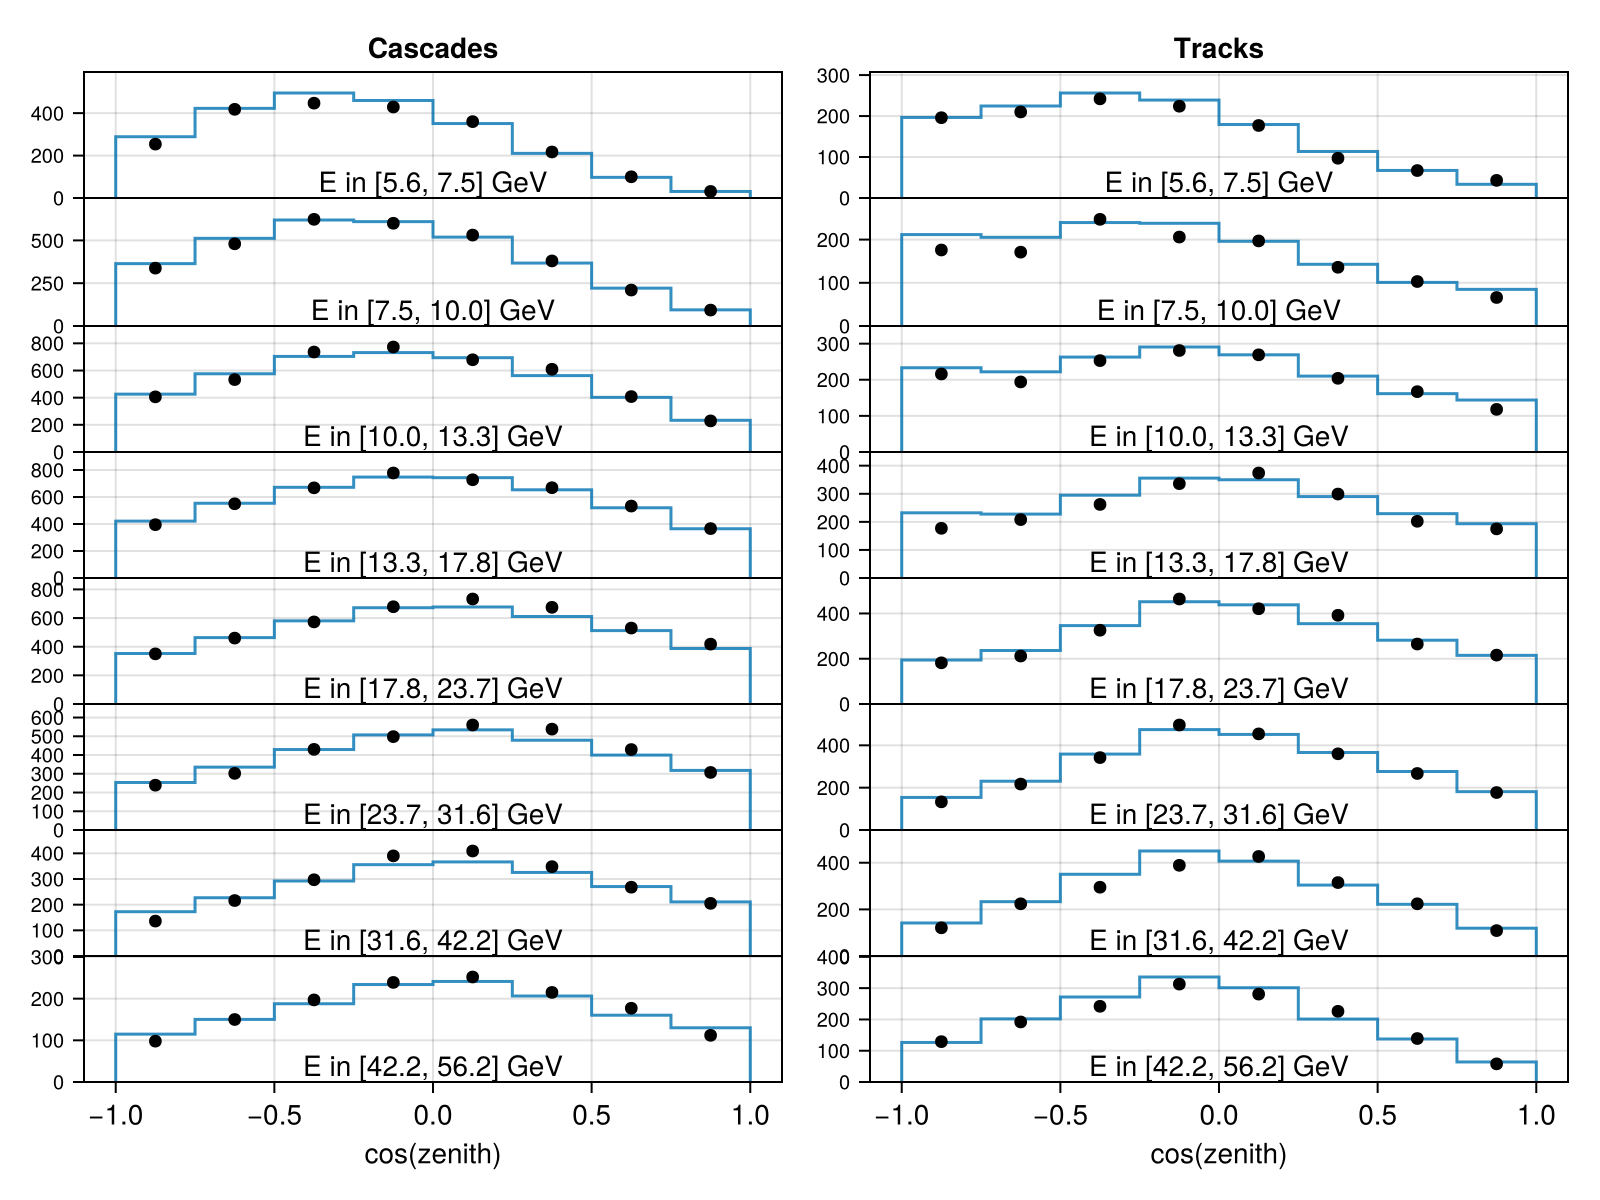

In [ ]:
img = experiments.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/icecube_data_SM.png", img)

In [ ]:
likelihood = Newtrinos.generate_likelihood(experiments);
result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (r=31, N=31), p)

Progress:  67%|███████████████████████████▌             |  ETA: 0:21:34

In [ ]:
using CairoMakie

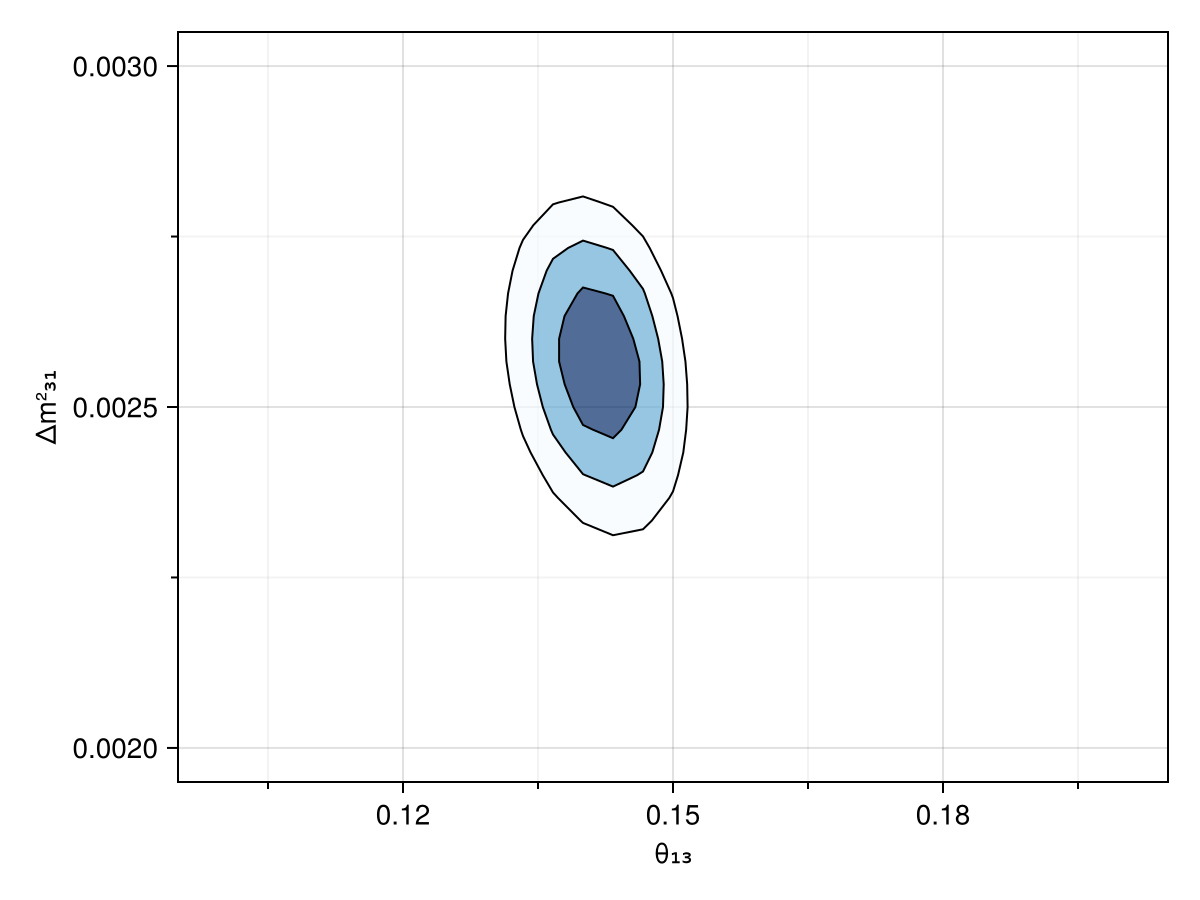

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/icecube_thetadelta_SM.png", img)
